In [61]:
import cv2
import pytesseract
import matplotlib.pyplot as plt 

In [62]:
pytesseract.pytesseract.tesseract_cmd = r'C:\Program Files\Tesseract-OCR\tesseract.exe'

In [80]:
img = cv2.imread("ocr.jpg")

In [81]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

In [82]:
text = pytesseract.image_to_string(img)

In [83]:
print(text)

‘THINGS YOU SHOULD KNOW ABOU ,_ GOOGLE v\/AVE*
Scenaric Tamara, a graduate student and TA, is teaching one
section of 20 students from Dn Bristol's 200-student lecture
course, Introduction to Psychology Before the semester begins,
‘Tamara and the nine other TAs meet with Dr. Bristol. He e><-
plains that assignments will be done by student teams us- ing an
application called Wave for the coursework. Wave, he says, is
like e-mail, sort of, and like a chat and collaboration space, sort
of, but that it is different from tools they have used before.
Students will use Wave to collaborate, share resources and data,
talk through their findings, and discover ways to apply what they
learn to other proiects. Wave can be used synchronously and as
a place for iterative collabo- ration. In addition, TAs will use
Wave to communicate with their student teams, checking in for
questions and monitor- ing progress. During the first lecture, Dr.
Bristol assigns an exercise that involves observing interacti

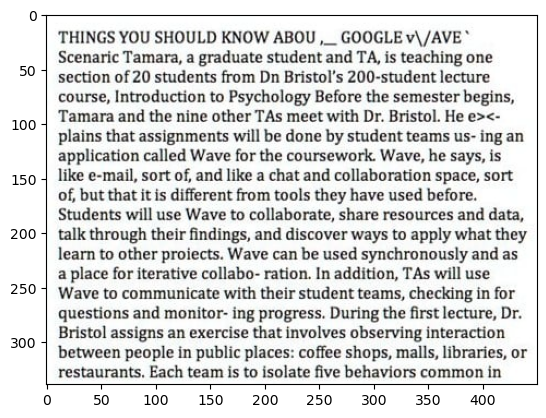

In [84]:
plt.imshow(img)

In [85]:
thresh = cv2.adaptiveThreshold(gray , 255 , cv2.ADAPTIVE_THRESH_GAUSSIAN_C , cv2.THRESH_BINARY,85,11)

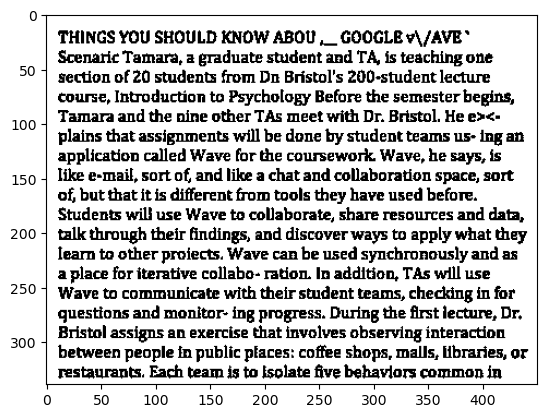

In [86]:
plt.imshow(cv2.cvtColor(thresh,cv2.COLOR_BGR2RGB))

In [87]:
H, W ,_ = img.shape

In [88]:
boxes = pytesseract.image_to_data(img , lang="eng")

In [89]:
print(boxes)

level	page_num	block_num	par_num	line_num	word_num	left	top	width	height	conf	text
1	1	0	0	0	0	0	0	450	339	-1	
2	1	1	0	0	0	11	15	430	318	-1	
3	1	1	1	0	0	11	15	430	318	-1	
4	1	1	1	1	0	11	15	376	15	-1	
5	1	1	1	1	1	11	16	52	11	82.095024	‘THINGS
5	1	1	1	1	2	67	16	28	11	96.136116	YOU
5	1	1	1	1	3	100	16	56	11	95.390770	SHOULD
5	1	1	1	1	4	162	6	37	31	95.390770	KNOW
5	1	1	1	1	5	208	6	35	31	93.238266	ABOU
5	1	1	1	1	6	251	24	16	5	85.798141	,_
5	1	1	1	1	7	271	16	55	11	93.279259	GOOGLE
5	1	1	1	1	8	330	15	57	15	79.395050	v\/AVE*
4	1	1	1	2	0	12	33	397	15	-1	
5	1	1	1	2	1	12	24	55	31	93.092949	Scenaric
5	1	1	1	2	2	75	24	50	31	96.942490	Tamara,
5	1	1	1	2	3	129	37	7	8	96.651543	a
5	1	1	1	2	4	140	33	58	15	96.651543	graduate
5	1	1	1	2	5	203	33	50	12	96.977615	student
5	1	1	1	2	6	257	33	24	12	96.741127	and
5	1	1	1	2	7	285	34	21	13	96.645363	TA,
5	1	1	1	2	8	311	37	10	8	96.464684	is
5	1	1	1	2	9	325	33	56	15	96.646622	teaching
5	1	1	1	2	10	385	37	24	8	96.394096	one
4	1	1	1	3	0	12	51	395	12	-1	
5	1	1	1	3	1	12	

In [90]:
for x ,b in enumerate(boxes.splitlines()):
    if x != 0:
        b = b.split(" ")
        print(b)
        if len(b) ==12:
            x,y,w,h = int(b[6]) , int(b[7]), int(b[8]) ,int(b[9])
            cv2.rectangle(img , (x,y) , (x+w, y+h) , (0,255,0),3 )
            cv2.putText(img,b[11] ,(x,y),cv2.FONT_HERSHEY_SIMPLEX ,1,(0,0,255),3 )            

['1\t1\t0\t0\t0\t0\t0\t0\t450\t339\t-1\t']
['2\t1\t1\t0\t0\t0\t11\t15\t430\t318\t-1\t']
['3\t1\t1\t1\t0\t0\t11\t15\t430\t318\t-1\t']
['4\t1\t1\t1\t1\t0\t11\t15\t376\t15\t-1\t']
['5\t1\t1\t1\t1\t1\t11\t16\t52\t11\t82.095024\t‘THINGS']
['5\t1\t1\t1\t1\t2\t67\t16\t28\t11\t96.136116\tYOU']
['5\t1\t1\t1\t1\t3\t100\t16\t56\t11\t95.390770\tSHOULD']
['5\t1\t1\t1\t1\t4\t162\t6\t37\t31\t95.390770\tKNOW']
['5\t1\t1\t1\t1\t5\t208\t6\t35\t31\t93.238266\tABOU']
['5\t1\t1\t1\t1\t6\t251\t24\t16\t5\t85.798141\t,_']
['5\t1\t1\t1\t1\t7\t271\t16\t55\t11\t93.279259\tGOOGLE']
['5\t1\t1\t1\t1\t8\t330\t15\t57\t15\t79.395050\tv\\/AVE*']
['4\t1\t1\t1\t2\t0\t12\t33\t397\t15\t-1\t']
['5\t1\t1\t1\t2\t1\t12\t24\t55\t31\t93.092949\tScenaric']
['5\t1\t1\t1\t2\t2\t75\t24\t50\t31\t96.942490\tTamara,']
['5\t1\t1\t1\t2\t3\t129\t37\t7\t8\t96.651543\ta']
['5\t1\t1\t1\t2\t4\t140\t33\t58\t15\t96.651543\tgraduate']
['5\t1\t1\t1\t2\t5\t203\t33\t50\t12\t96.977615\tstudent']
['5\t1\t1\t1\t2\t6\t257\t33\t24\t12\t96.741127\tand']


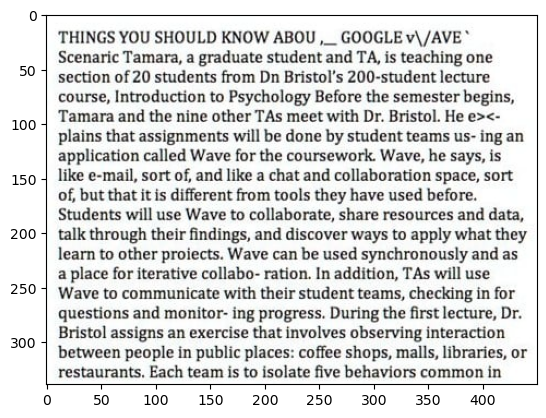

In [91]:
plt.imshow(img)